**Amazon Product Review EDA**

The purpose of this notebook is to do some exploration of the Amazon product review data that was cleaned in a prior analysis

In [ ]:
#First import some packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#First load the data

rev = pd.read_csv('Data/AmazonDataCleaned.csv', index_col=False)

In [ ]:
#Lets take a look at the data

rev.head()

Text(0.5, 1.0, 'Sales Ranking by Overall Rating')

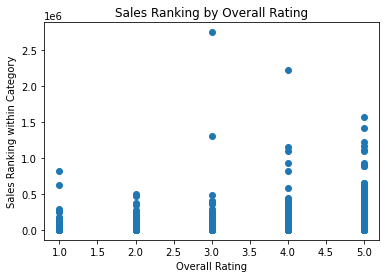

In [4]:
plt.scatter(rev.overall, rev.Ranking)
plt.xlabel('Overall Rating')
plt.ylabel('Sales Ranking within Category')
plt.title('Sales Ranking by Overall Rating')

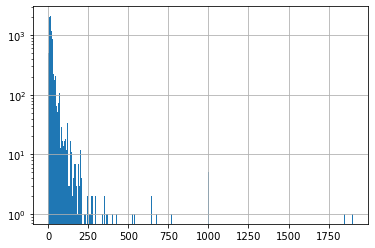

In [5]:
# Make some histograms
rev.price.hist(bins = 1000)
plt.yscale('log')

<AxesSubplot:>

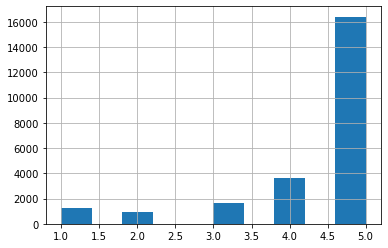

In [6]:
rev.overall.hist()

Text(0.5, 1.0, 'Frequency of rankings')

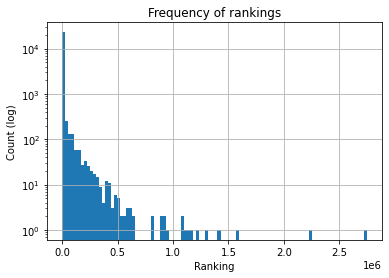

In [7]:
rev.Ranking.hist(bins = 100)
plt.yscale('log')
plt.xlabel('Ranking')
plt.ylabel('Count (log)')
plt.title('Frequency of rankings')

In [8]:
#It looks like there may be an erroneous value in price, but we'll need to take a look

priceErrors = rev[rev['price'] == rev['price'].max()]
priceErrors

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,category,title,brand,rank,main_cat,price,rankCat,catRank,Ranking
13356,5.0,False,"03 4, 2012",A155VL90CYNVKS,B002ANA3UM,Robio Dante,"This product really, really blows. Five stars,...",It Blows,1330819200,"['Home & Kitchen', 'Bath', 'Bathroom Accessori...","Dyson Airblade AB 02, 110-120V, Die Cast Alumi...",Dyson,"313,900 in Industrial & Scientific (",Industrial & Scientific,1899.99,"['313,900 in Industrial & Scientific (']","313,900 in Industrial & Scientific (",313900.0


In [9]:
#I sure hope these are errors, I doubt you'd move many units if your alarm clock or hot pads were $1000... 
# As a first step, I'm going to check all of the products over $300 against the rest of the dataset to see if there is a more reasonable
# price value that we can use to impute these data. If there are none, we'll have to drop these rows. 
possiblePriceErrors = rev[rev['price'] >= 300]
#Insert a column for possible imputable vals
possiblePriceErrors.insert(possiblePriceErrors.columns.get_loc('Ranking')+1, 'imputedVal', np.nan)
#For each row, check the full data set for the average value of the product cost.
for item in range(len(possiblePriceErrors)):
    #If the item is in the full dataset, calculate the average price and determine if it is different from the erroneous values
    if possiblePriceErrors['asin'].iloc[item] in rev['asin'].unique():
        if rev[rev['asin'] == possiblePriceErrors['asin'].iloc[item]]['price'].mean() != possiblePriceErrors['price'].iloc[item]:
            possiblePriceErrors['imputedVal'].iloc[item] = rev[rev['asin'] == possiblePriceErrors['asin'].iloc[item]]['price'].mean()
        else:
            possiblePriceErrors['imputedVal'] = False
    else:
        possiblePriceErrors['imputedVal'] = False
        
possiblePriceErrors['imputedVal']

C:\Users\micha\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


2161     False
2431     False
2575     False
2899     False
3839     False
3950     False
4976     False
5175     False
5245     False
6394     False
6395     False
6504     False
6949     False
7138     False
8066     False
8080     False
8352     False
8394     False
8611     False
8969     False
9001     False
9505     False
10210    False
11084    False
11489    False
11494    False
11787    False
12011    False
12517    False
13356    False
13823    False
13946    False
14635    False
15487    False
16375    False
16571    False
16711    False
17312    False
17500    False
18436    False
18935    False
19795    False
20370    False
21019    False
21046    False
21433    False
21716    False
21892    False
22098    False
22811    False
23007    False
23592    False
Name: imputedVal, dtype: bool

In [10]:
#It appears these were the only instances of the items in the dataset, so we need to inspect each item to determine if the 
#price is reasonable or not

possiblePriceErrors


,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,category,title,brand,rank,main_cat,price,rankCat,catRank,Ranking,imputedVal
2161,1.0,True,"01 27, 2017",A2TUWP5FT0Z0EL,B01DEVIQOS,FrontStreetMama,too hard to see across room.,If its next to your bed its ok.,1485475200,"['Home & Kitchen', 'Home Dcor', 'Clocks', 'Ala...",ZHPUAT [New Version Smart Light Alarm Clock wi...,ZHPUAT,"['>#85,079 in Electronics (See Top 100 in Elec...",Amazon Home,999.99,"[""85,079 in Electronics (See Top 100 in Electr...","2,017 in Home & Kitchen > Home Dcor > Clocks >...",2017.0,False
2431,4.0,True,"01 7, 2015",A1Q42RBM4LH0ZQ,B00FJXS3YI,lookout,Outstanding Tree!! I have had live trees for o...,This is really better. Only reason not 5 Stars...,1420588800,"['Home & Kitchen', 'Seasonal Dcor', 'Trees']",Balsam Hill BH Balsam Fir Premium Artificial C...,Balsam Hill,"['>#473,874 in Home & Kitchen (See Top 100 in ...",Amazon Home,529.00,"[""473,874 in Home & Kitchen (See Top 100 in Ho...",775 in Home & Kitchen > Seasonal Dcor > Trees'],775.0,False
2575,1.0,False,"06 25, 2010",A60N93VTK88RM,B00383GBTU,Shopper,I suppose there is a market for a $329.00 fan....,No Way! What is Dyson thinking?,1277424000,"['Home & Kitchen', 'Heating, Cooling & Air Qua...","Dyson Air Multiplier Table Fan, 12 Inches, White",Dyson,"['>#1,953,331 in Home & Kitchen (See Top 100 i...",Amazon Home,524.99,"[""1,953,331 in Home & Kitchen (See Top 100 in ...","5,536 in Home & Kitchen > Heating, Cooling & A...",5536.0,False
2899,5.0,False,"02 22, 2016",A3O4BRVEVJPNKL,B00YCP6RBA,R Michelle P,First let me say I did not purchase this from ...,"Big investment, but well worth it",1456099200,"['Home & Kitchen', 'Kitchen & Dining', 'Coffee...",Delonghi De'Longhi ECAM23260SB Magnifica Smart...,DeLonghi,"['>#190,293 in Kitchen & Dining (See Top 100 i...",Amazon Home,999.50,"[""190,293 in Kitchen & Dining (See Top 100 in ...","583 in Kitchen & Dining > Coffee, Tea & Espres...",583.0,False
3839,5.0,False,"03 5, 2014",A2BGUQMHHUUJSJ,B001TO7108,Wake,I recently purchased this Saucepan because it ...,Great Saucepan!,1393977600,"['Home & Kitchen', 'Kitchen & Dining', 'Cookwa...",USA Pan 1550CW-1 5-Ply Stainless Steel 8 Piece...,USA Pan,"['>#30,820 in Kitchen & Dining (See Top 100 in...",Amazon Home,363.06,"[""30,820 in Kitchen & Dining (See Top 100 in K...",512 in Kitchen & Dining > Cookware > All Pans'],512.0,False
3950,4.0,True,"05 29, 2017",AM79BJB8C7ZHO,B00E8MADPS,digitaldan,The grinder works very well. I run 25 lbs of w...,Good heavy-duty grinder,1496016000,"['Home & Kitchen', 'Kitchen & Dining', 'Kitche...",LEM Products W780A Stainless Steel Big Bite El...,LEM,"['>#113,917 in Toys & Games (See Top 100 in To...",Sports & Outdoors,427.49,"[""113,917 in Toys & Games (See Top 100 in Toys...",77 in Home & Kitchen > Kitchen & Dining > Kitc...,77.0,False
4976,5.0,True,"07 18, 2016",A2WH97OSR97AK4,B00WPL54EE,gigster,Wow. Just put this in about 2 hours ago and c...,Just went in my room and I didn't know it was on.,1468800000,"['Home & Kitchen', 'Heating, Cooling & Air Qua...",Haier ESAQ406P Serenity Series 6050 BTU 115V W...,Haier,"['>#599,593 in Home & Kitchen (See Top 100 in ...",Amazon Home,313.07,"[""599,593 in Home & Kitchen (See Top 100 in Ho...","81 in Home & Kitchen > Heating, Cooling & Air ...",81.0,False
5175,5.0,True,"04 12, 2013",A33IQE9PV9P0U2,B005VHCSJS,Tony R.,I really love this bed. I was worried buying ...,Love this bed,1365724800,"['Home & Kitchen', 'Furniture', 'Bedroom Furni...",Coaster 300369Q-CO Queen Tan Phoenix Upholster...,Coaster Home Furnishings,"['>#2,144,042 in Home & Kitchen (See top 100)'...",Amazon Home,422.68,"[""2,144,042 in Home & Kitchen (See top 100)', ...",347 in Home & Kitchen > Furniture > Bedroom Fu...,347.0,False
5245,5.0,True,"03 14, 2017",A2UCTRTQOMLQNC,B006LP12LO,206area,"I totally love this chic, modern artwork. I pu...",So awesome! Perfect!,1489449600,"['Home & Kitchen', 'Home Dcor', 'Home Dcor Acc...",Extra Large Modern C

In [11]:
#Many of these prices seem reasonable for the items. There are a few mattresses, some Dyson vaccums and some high end cookware.
#The only outliers appear to be the items priced at $999.99, so we'll drop those. 
priceErrors = rev[rev['price'] == 999.99]
rev.drop(priceErrors.index, axis=0, inplace = True)
#There also appear to be several items with a pric eof zero. These need to be dropped.
zeros = rev[rev['price'] == 0]
rev.drop(zeros.index, axis=0, inplace=True)


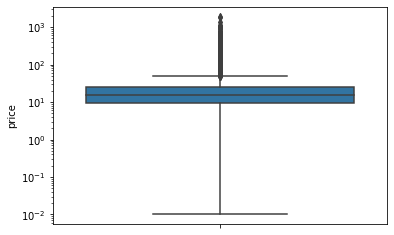

In [12]:
#Lets investigate possible outliers in the price data.
sns.boxplot(y='price', data = rev)
plt.yscale('log')
# There could be some outliers there...

In [13]:
#Lots see how many fall outside 3*IQRs
summary = rev['price'].describe()
qtr1 = summary['25%']
qtr3 = summary['75%']
IQR = qtr3-qtr1
outliers = rev[rev['price'] > 3*IQR]
outliers.shape

(1910, 18)

In [14]:
#I'll try dropping these outlier points
rev = rev.drop(outliers.index, axis = 0)

In [15]:
#It also appears there are some industrial items included in the data set, since I'm only interested in individual purchases, I
#will drop all industrial products. 
industrial = rev[rev['price'] > 900]
rev.drop(industrial.index, axis = 0, inplace = True)


Text(0, 0.5, 'Frequency (log)')

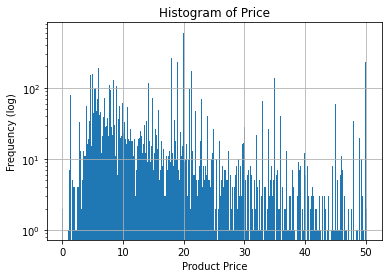

In [16]:
#now we'll take a look at the data again. 
rev.price.hist(bins = 1000)
plt.yscale('log')
plt.title('Histogram of Price')
plt.xlabel('Product Price')
plt.ylabel('Frequency (log)')


In [17]:
#Now I'll take a look at the items with the worst rankings to see if there are any outliers there.

largestRank = rev.nlargest(15, 'Ranking').reset_index()
largestRank

,index,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,category,title,brand,rank,main_cat,price,rankCat,catRank,Ranking
0,16427,3.0,True,"05 4, 2013",A2KDKK1MJKQ8LL,B005M2WHPC,Paula M Enright,Cheap quality plastic but is functional for wh...,You get what you pay for,1367625600,"['Home & Kitchen', 'Bath', 'Bathroom Accessori...",MTR Set of 2 Waterfall Soap Saver Dish w/Ring ...,MTR,"2,746,995 in Clothing, Shoes & Jewelry (","<img src=""https://images-na.ssl-images-amazon....",9.90,"['2,746,995 in Clothing, Shoes & Jewelry (']","2,746,995 in Clothing, Shoes & Jewelry (",2746995.0
1,14529,4.0,True,"07 1, 2015",A2ST31JVMATGW2,B00OOHGSXS,JW,Not as quiet as one might hope for.,Not so quiet,1435708800,"['Home & Kitchen', 'Bath', 'Bathroom Accessori...",Jet Shower Curtain Rings | 12pcs Smoothest Gli...,Shower Curtain Rings,"2,228,325 in Clothing, Shoes & Jewelry (","<img src=""https://images-na.ssl-images-amazon....",11.99,"['2,228,325 in Clothing, Shoes & Jewelry (']","2,228,325 in Clothing, Shoes & Jewelry (",2228325.0
2,8529,5.0,True,"05 22, 2015",A2R4KOMVZYE0RQ,B00N9W5BZK,Danny,love it and would order more anytime,Five Stars,1432252800,"['Home & Kitchen', 'Home Dcor', 'Home Dcor Acc...","Japanese Handheld Folding Fan, Cherry Blossoms...",DawningView,"1,571,143 in Clothing, Shoes & Jewelry (","<img src=""https://images-na.ssl-images-amazon....",9.48,"['1,571,143 in Clothing, Shoes & Jewelry (']","1,571,143 in Clothing, Shoes & Jewelry (",1571143.0
3,19176,5.0,True,"11 25, 2013",A1EOPEZRNL93CM,B000COVNXC,Erica Davis,Nicely made - heavy duty and looks great. The...,Nicely made,1385337600,"['Home & Kitchen', 'Bath', 'Bathroom Accessori...",NFL Denver Broncos Shower Curtain,Sports Coverage,"1,418,981 in Sports & Outdoors (",Sports & Outdoors,34.90,"['1,418,981 in Sports & Outdoors (']","1,418,981 in Sports & Outdoors (",1418981.0
4,12837,3.0,True,"06 5, 2017",A12R1MVI4SW2TF,B001OF4KAG,Michele,Cute....surprisingly strong for the size but m...,Alot smaller than expected,1496620800,"['Home & Kitchen', 'Event & Party Supplies', '...",Fridge Bling Diamond Magnets In Gift Packaging...,WeddingStar,"['>#1,302,134 in Home & Kitchen (See Top 100 i...",Amazon Home,26.02,"[""1,302,134 in Home & Kitchen (See Top 100 in ...","1,302,134 in Home & Kitchen (See Top 100 in Ho...",1302134.0
5,2844,5.0,True,"11 14, 2009",A2QJYJXMVFZA3H,B0010EI16U,SUN,What a great deal. Good quality and well made....,"years later, still doing the job",1258156800,"['Home & Kitchen', 'Bedding', 'Sheets & Pillow...","Betty Dain Sleepwear Satin Pillow Case, White,...",Betty Dain,"1,218,420 in Beauty & Personal Care (",All Beauty,29.99,"['1,218,420 in Beauty & Personal Care (']","1,218,420 in Beauty & Personal Care (",1218420.0
6,15654,4.0,True,"10 18, 2011",A382CSEEBQ6ETD,B001G0P4XQ,Lady Pamela,Nice colorful fans. They will go well with my...,Fast shipment,1318896000,"['Home & Kitchen', 'Event & Party Supplies', '...",Silk Hand Fans #G765 (Bright Yellow),House of Rice,"1,150,482 in Clothing, Shoes & Jewelry (","<img src=""https://images-na.ssl-images-amazon....",5.99,"['1,150,482 in Clothing, Shoes & Jewelry (']","1,150,482 in Clothing, Shoes & Jewelry (",1150482.0
7,3739,5.0,True,"03 24, 2017",A1C0PGC2T3ZCH,B01HDW6MGI,Imburne,Pretty cool clock.. Easy to stop the alarm for...,Pretty cool clock,1490313600,"['Home & Kitchen', 'Home Dcor', 'Clocks', 'Ala...",Anywa New Fashion Pyramid Temperature 7 Colors...,Anywa,"1,105,673 in Clothing, Shoes & Jewelry (","<img src=""https://images-na.ssl-images-amazon....",7.00,"['1,105,673 in Clothing, Shoes & Jewelry (']","1,105,673 in Clothing, Shoes & Jewelry (",1105673.0
8,22673,5.0,True,"03 11, 2016",A5JNW63L24KZX,B013QSSQMG,ronn_ronn09,love it!!!,Five Stars,1457654400,"['Home & Kitchen', 'Bedding', 'Decorative Pill...",Ablevel Beautiful Peacock Personalized Square ...,ABlevel,"1,095,948 in Clothing, Shoes & Jewelry (","<img src=""https://images-na.ssl-images-amazon....",20.00,"['1,095,948 in Clot

Text(0, 0.5, 'Frequency (log)')

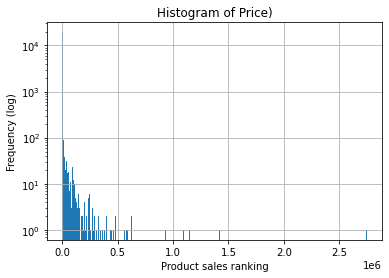

In [18]:
#Now lets take a look at the highest ranking in more detail
rev.Ranking.hist(bins = 1000)
plt.yscale('log')
plt.title('Histogram of Price)')
plt.xlabel('Product sales ranking')
plt.ylabel('Frequency (log)')


Text(0.5, 1.0, 'Box Plot for sales ranking')

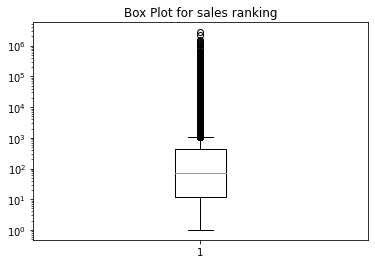

In [19]:
#Lets take a look at the boxplot of ranking.
plt.boxplot(rev.Ranking)
plt.yscale('log')
plt.title('Box Plot for sales ranking')

In [20]:
# It looks like there are some outliers in there... Lets see how many fall outside of three IQRs.
summary = rev['Ranking'].describe()
qtr1 = summary['25%']
qtr3 = summary['75%']
IQR = qtr3-qtr1
possibleOutliers = rev[rev['Ranking']  > 3*IQR]
possibleOutliers.shape

(3220, 18)

In [21]:
#These are a lot of data points, but it does seem to make sense to drop the outliers I'll continue with a new copy of the df
df = rev.drop(possibleOutliers.index, axis = 0)

In [22]:
#An important note is that the ranking as it appears is actually the inverse of what we would think meaning that a lower 
#ranking is better, so we'll invert the ranking
#maxRank = max(df['Ranking'])
#df['salesRanking'] = df['Ranking'].apply(lambda x: maxRank/x)
df['salesRanking'] = df['Ranking']

In [23]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,category,title,brand,rank,main_cat,price,rankCat,catRank,Ranking,salesRanking
0,5.0,True,"07 9, 2014",A152F0RA5VPLC6,B0013DXP2S,Susan,Sturdy and I love all off sizes.,Five Stars,1404864000,"['Home & Kitchen', 'Kitchen & Dining', 'Kitche...",RSVP Endurance 18/8 Stainless Steel Nesting Me...,RSVP International,"['>#151,882 in Kitchen & Dining (See Top 100 i...",Amazon Home,33.95,"[""151,882 in Kitchen & Dining (See Top 100 in ...",619 in Kitchen & Dining > Kitchen Utensils & G...,619.0,619.0
1,5.0,True,"02 18, 2017",A1D64HQ2Y53671,B01BGVKV8W,mark sommers,Very nice but the first one got broke in shipp...,Five Stars,1487376000,"['Home & Kitchen', 'Bath', 'Bathroom Accessori...",InterDesign RealWood Glass Canister to Hold Co...,InterDesign,"['>#785,384 in Home & Kitchen (See Top 100 in ...",Amazon Home,25.84,"[""785,384 in Home & Kitchen (See Top 100 in Ho...","1,063 in Home & Kitchen > Bath > Bathroom Acce...",1063.0,1063.0
2,5.0,True,"02 9, 2017",A1LIH3DPTZKWE9,B0094CVPJK,T.S.Gibson,Using it for my dad's recliner. Doesn't stay u...,Good cover,1486598400,"['Home & Kitchen', 'Home Dcor', 'Slipcovers', ...","Pegasus Home Reversible Furniture Protector, S...",Pegasus Home Fashions,"['>#13,740 in Home & Kitchen (See Top 100 in H...",Amazon Home,29.99,"[""13,740 in Home & Kitchen (See Top 100 in Hom...",15 in Home & Kitchen > Home Dcor > Slipcovers ...,15.0,15.0
3,5.0,True,"02 27, 2017",A3TGF09SHXQDUX,B011AYCTX0,Lisa J. Rief,Beautiful and classy runner rug! We have it in...,Beautiful!,1488153600,"['Home & Kitchen', 'Home Dcor', 'Area Rugs, Ru...",Collections Etc Stripe Berber 10-Ft Long High ...,Collections Etc,"['>#123,807 in Home & Kitchen (See top 100)', ...",Amazon Home,32.98,"[""123,807 in Home & Kitchen (See top 100)', '""...","238 in Home & Kitchen > Home Dcor > Area Rugs,...",238.0,238.0
4,4.0,True,"03 20, 2017",A1NDXNBRT3YY0V,B017UR2U1C,me,its what it is,Four Stars,1489968000,"['Home & Kitchen', 'Wall Art', 'Posters & Prin...",Poster Discount Three Stooges Tin Metal Sign :...,Poster Discount,"['>#97,381 in Home & Kitchen (See Top 100 in H...",Amazon Home,9.73,"[""97,381 in Home & Kitchen (See Top 100 in Hom...","1,019 in Home & Kitchen > Wall Dcor > Posters ...",1019.0,1019.0


Text(0.5, 1.0, 'Box Plot of Sales Ranking')

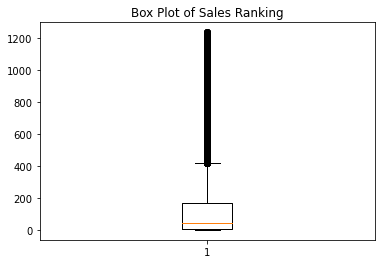

In [24]:
plt.boxplot(df['Ranking'])
plt.title('Box Plot of Sales Ranking')

Text(0.5, 1.0, 'Sales Ranking vs. Overall Rating')

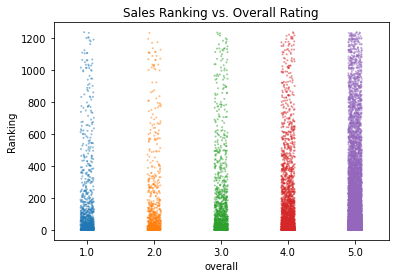

In [25]:
#Now lets take a look at ranking vs. the numeric variables

sns.stripplot(x = 'overall', y = 'Ranking', data = df, size = 2, alpha = 0.5)
plt.title('Sales Ranking vs. Overall Rating')

Text(0.5, 1.0, 'Violin Plot of Ranking vs. Overall Rating')

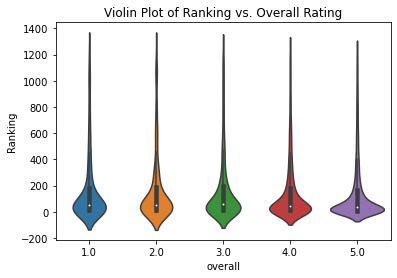

In [26]:
#Its starting to look liket there may be a relationship... Lets see the violin plot

sns.violinplot(x='overall', y = 'Ranking', data = df)
plt.title('Violin Plot of Ranking vs. Overall Rating')
#plt.yscale('log')

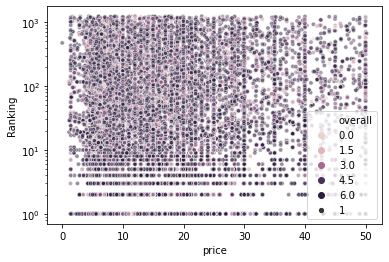

In [27]:
# Now lets take a look at price vs. Ranking
sns.scatterplot(x='price', y = 'Ranking', data = df, size = 1, alpha = 0.5, hue = 'overall')
plt.yscale('log')

In [28]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,category,title,brand,rank,main_cat,price,rankCat,catRank,Ranking,salesRanking
0,5.0,True,"07 9, 2014",A152F0RA5VPLC6,B0013DXP2S,Susan,Sturdy and I love all off sizes.,Five Stars,1404864000,"['Home & Kitchen', 'Kitchen & Dining', 'Kitche...",RSVP Endurance 18/8 Stainless Steel Nesting Me...,RSVP International,"['>#151,882 in Kitchen & Dining (See Top 100 i...",Amazon Home,33.95,"[""151,882 in Kitchen & Dining (See Top 100 in ...",619 in Kitchen & Dining > Kitchen Utensils & G...,619.0,619.0
1,5.0,True,"02 18, 2017",A1D64HQ2Y53671,B01BGVKV8W,mark sommers,Very nice but the first one got broke in shipp...,Five Stars,1487376000,"['Home & Kitchen', 'Bath', 'Bathroom Accessori...",InterDesign RealWood Glass Canister to Hold Co...,InterDesign,"['>#785,384 in Home & Kitchen (See Top 100 in ...",Amazon Home,25.84,"[""785,384 in Home & Kitchen (See Top 100 in Ho...","1,063 in Home & Kitchen > Bath > Bathroom Acce...",1063.0,1063.0
2,5.0,True,"02 9, 2017",A1LIH3DPTZKWE9,B0094CVPJK,T.S.Gibson,Using it for my dad's recliner. Doesn't stay u...,Good cover,1486598400,"['Home & Kitchen', 'Home Dcor', 'Slipcovers', ...","Pegasus Home Reversible Furniture Protector, S...",Pegasus Home Fashions,"['>#13,740 in Home & Kitchen (See Top 100 in H...",Amazon Home,29.99,"[""13,740 in Home & Kitchen (See Top 100 in Hom...",15 in Home & Kitchen > Home Dcor > Slipcovers ...,15.0,15.0
3,5.0,True,"02 27, 2017",A3TGF09SHXQDUX,B011AYCTX0,Lisa J. Rief,Beautiful and classy runner rug! We have it in...,Beautiful!,1488153600,"['Home & Kitchen', 'Home Dcor', 'Area Rugs, Ru...",Collections Etc Stripe Berber 10-Ft Long High ...,Collections Etc,"['>#123,807 in Home & Kitchen (See top 100)', ...",Amazon Home,32.98,"[""123,807 in Home & Kitchen (See top 100)', '""...","238 in Home & Kitchen > Home Dcor > Area Rugs,...",238.0,238.0
4,4.0,True,"03 20, 2017",A1NDXNBRT3YY0V,B017UR2U1C,me,its what it is,Four Stars,1489968000,"['Home & Kitchen', 'Wall Art', 'Posters & Prin...",Poster Discount Three Stooges Tin Metal Sign :...,Poster Discount,"['>#97,381 in Home & Kitchen (See Top 100 in H...",Amazon Home,9.73,"[""97,381 in Home & Kitchen (See Top 100 in Hom...","1,019 in Home & Kitchen > Wall Dcor > Posters ...",1019.0,1019.0


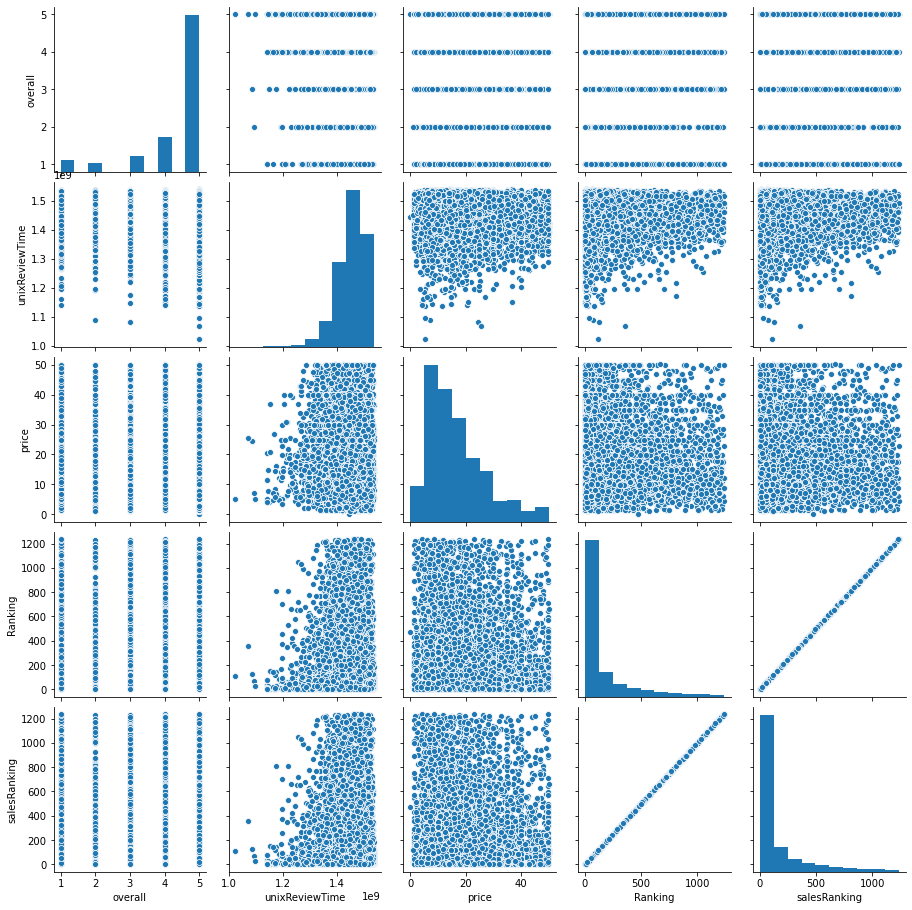

In [29]:
#Lets see a pairplot

sns.pairplot(df.drop('verified', axis = 1))

<AxesSubplot:xlabel='price', ylabel='overall'>

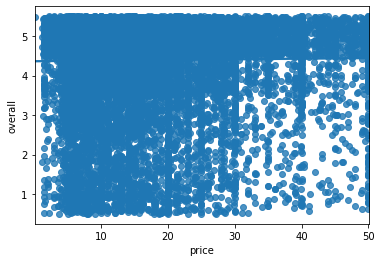

In [30]:
#I'll explore the possibility that there is a relationship between overall
sns.regplot(x = 'price', y = 'overall', data= df, y_jitter = 0.5)

I doubt there is a relationship between overall and price considering the confidence interval for the slope crosses zero.
I'll continue to look for linear relationships.

Text(0.5, 1.0, 'Ranking vs. Price')

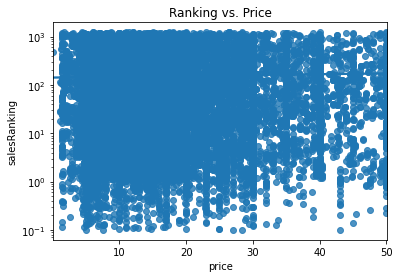

In [31]:
#There definitely appears to be a relationship between price and Ranking
sns.regplot(x = 'price', y = 'salesRanking', data= df, y_jitter = 0.9)
plt.yscale('log')
plt.title('Ranking vs. Price')

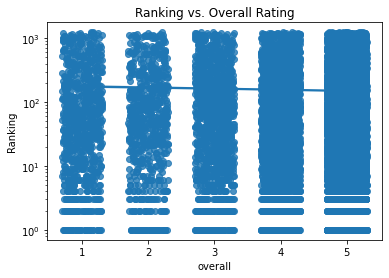

In [32]:
#There definitely appears to be a relationship between price and Ranking
sns.regplot(x = 'overall', y = 'Ranking', data= df, x_jitter = 0.3)
plt.title('Ranking vs. Overall Rating')
plt.yscale('log')


<AxesSubplot:xlabel='ratingPrice', ylabel='Ranking'>

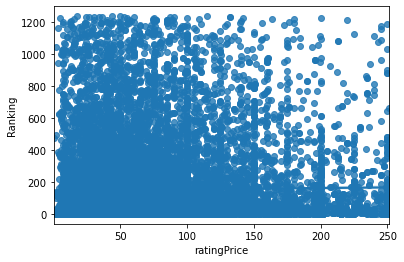

In [33]:
#Lets explore the possibility that there may be an interaction

df['ratingPrice'] = df['overall']*df['price']
sns.regplot(x = 'ratingPrice', y = 'Ranking', data = df)

#it looks like there could be an interaction. 

I'm curious to see if there are any hidden patterns in the data that I can use as a predictor variable. I'll use the KMeans clustering algorithm from sklearn to engineer some clusters. The first step will be to determine the number of clusters to use. I'll accomplish this using the elbow plot method. First I need to create an X vector for the KMeans algorithm. Then I'll test the variance explained by 1 to 50 clusters. Once we have the clusters we can append them to the data and look for interaction terms.

In [34]:
#First I need to prepare the data for the KMeans algorithm. I'll start by dropping categorical columns them.

obs = []
[obs.append(col) for col in df.columns if df[col].dtype == 'O']
yClf = df['reviewText']
xClf = df.drop(obs, axis = 1)

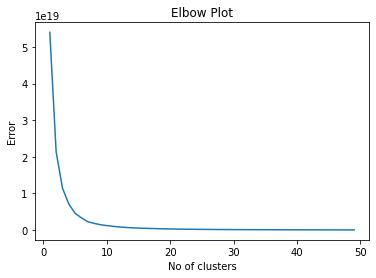

In [35]:
#Run through the number of clusters ranging form 1 to 50. 

from sklearn.cluster import KMeans
Error = []
for i in range(1, 50):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(xClf)
    Error.append(kmeans.inertia_)
plt.plot(range(1, 50), Error)
plt.title('Elbow Plot')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [36]:
#I'll plan to use 8 clusters. Now I need to generate the features and append them to the dataframe. 
kmeans = KMeans(n_clusters = 8)
kmeans.fit(xClf)
clusters = kmeans.predict(xClf)
df['clusters'] = clusters

Text(0.5, 1.0, 'Ranking vs Price varying by cluster')

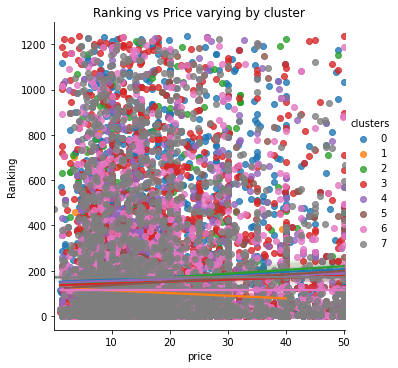

In [37]:
#Now I'll look for interaction terms using the clusters. 
#If the slopes or intercepts vary by cluster for ranking vs the other continuous variables then there are likely interactions
sns.lmplot(x = 'price', y = 'Ranking', hue = 'clusters', data = df)
plt.title('Ranking vs Price varying by cluster')

Text(0.5, 1.0, 'Ranking vs overall rating varying by cluster')

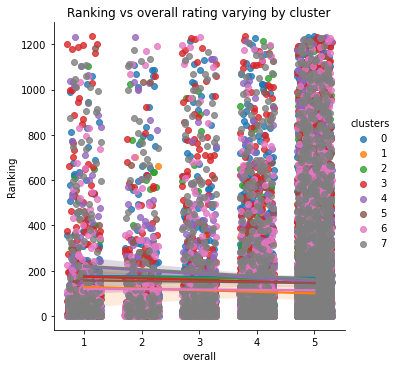

In [38]:
sns.lmplot(x = 'overall', y = 'Ranking', hue = 'clusters', data = df, x_jitter = 0.3)
plt.title('Ranking vs overall rating varying by cluster')

Next I want to create a continuous variable to reflect the sentiment of the review. 
This function will utilize the VADER sentiment analyzer and will average the sentiment of all sentances
in the review. The final variable will be the average of the compound score reported by VADER.


In [39]:
#First I need to import the subjectivity and VADER packages from nltk
import nltk
from nltk.corpus import subjectivity
from nltk import tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#The function creates an instance of the sentiment analyzer and tokenizes the review into sentances. 
#the sentiment of each sentance is stored in a list and the mean of the compound score is taken and returned. 
#If the review contains no text, then 0 is returned (equivalent of a neutral review)
def getSentiment(review):
    if len(review) == 0:
        return 0
    sid = SentimentIntensityAnalyzer()
    sentiment = []
    for sentance in tokenize.sent_tokenize(review):
        ss = sid.polarity_scores(sentance)
        sentiment.append(ss['compound'])
    return np.mean(sentiment)

In [40]:
#Now apply the function to the dataframe and store the results in a new column. 
df['reviewSentiment'] = df['reviewText'].apply(getSentiment)

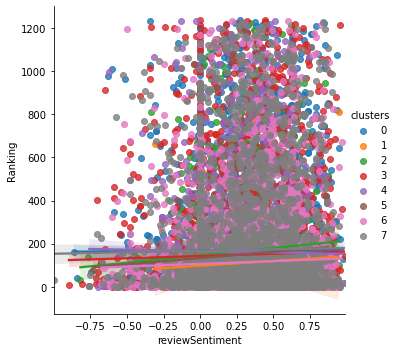

In [41]:
#Looks good. It appears there may be an interaction between cluster and the review sentiment. 
sns.lmplot(x='reviewSentiment', y = 'Ranking', data = df, hue = 'clusters')

In [42]:
#Next I want to create a variable to capture the length of the review to determine if the length has any impact on the Ranking. 

#Create a regex tokenizer to drop punctuation
tokenizer = nltk.RegexpTokenizer(r"\w+")
#Now apply the tokenizer to each review and count the lenth
df['reviewLength'] = df['reviewText'].apply(lambda x: len(tokenizer.tokenize(x)) if len(x) > 0 else 0)

<AxesSubplot:>

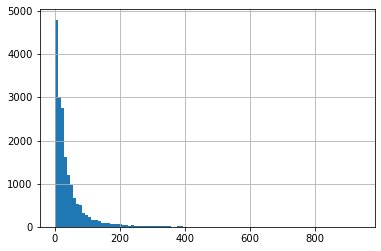

In [43]:
#Lets have a look at the results:
df['reviewLength'].hist(bins=100)

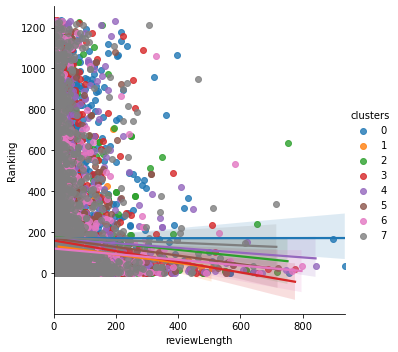

In [44]:
sns.lmplot(x='reviewLength', y = 'Ranking', data = df, hue = 'clusters')
#It looks like the ranking decreases as the reviews become increasingly verbose. 